# Lasso

In [38]:
# Import packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn

from hn.load_data import load_data

from sklearn import model_selection, metrics, feature_selection, preprocessing, neighbors, decomposition, svm
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression, SGDClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA
from sklearn.kernel_approximation import RBFSampler

# Functions for plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [23]:
def plot_roc_curve(y_score, y_truth):
    '''
    Plot an ROC curve.
    '''
    # Only take scores for class = 1
    y_score = y_score[:, 1]
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_truth, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [24]:
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores  = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

The number of samples: 113
The number of features: 159
(67, 80)
Selected 80 from 159 features.


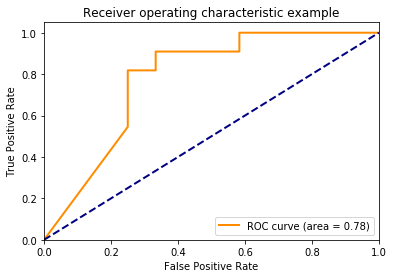

(67, 80)
Selected 80 from 159 features.


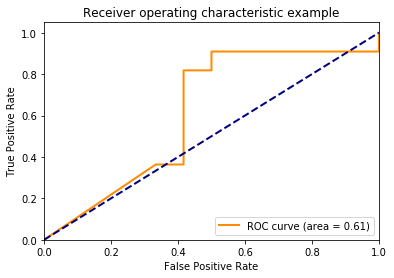

(68, 80)
Selected 80 from 159 features.


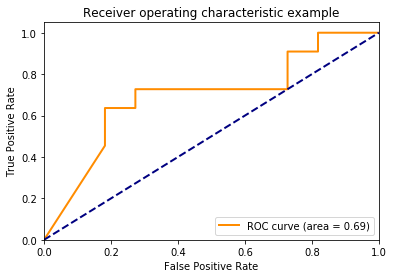

(68, 80)
Selected 80 from 159 features.


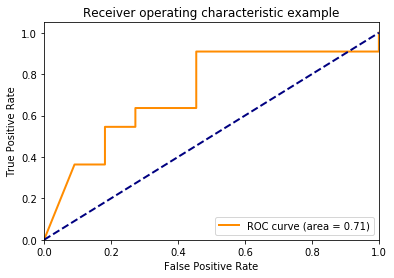

In [21]:
# Data loading and preprocessing

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of features: {len(data.columns)-1}')
y_labels = data['label']
del data['label']

y = sklearn.preprocessing.label_binarize(y_labels, ['T12', 'T34']) # 0 now stands for T12 and 1 for T34
y = [i[0] for i in y]
y = np.array(y)

cv_4fold = model_selection.StratifiedKFold(n_splits=4, shuffle=True)
split_X_train, split_X_test, split_y_train, split_y_test = train_test_split(data, y,
                                                    stratify=y, 
                                                    test_size=0.2)

# Loop over the folds
#for _ in range(0,20):
for training_index, validation_index in cv_4fold.split(split_X_train, split_y_train):
    train_scores = []
    test_scores = []
    X_validation = split_X_train.iloc[validation_index]
    y_validation = split_y_train[validation_index]
    X_train = split_X_train.iloc[training_index]
    y_train = split_y_train[training_index]

    # 1. Scaling 
    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_validation_scaled = scaler.transform(X_validation)

    # 2. Lasso
    # Now first use the selectfrom model module. Select all features with a weight above the median.
    selector = SelectFromModel(estimator=Lasso(alpha=10**(-10), random_state=None), threshold='median')
    selector.fit(X_train_scaled, y_train)
    n_original = X_train_scaled.shape[1]
    X_train_lasso = selector.transform(X_train_scaled)
    X_validation_lasso = selector.transform(X_validation_scaled)
    n_selected = X_train_lasso.shape[1]
    print(X_train_lasso.shape)
    print(f"Selected {n_selected} from {n_original} features.")

    # # LDA classifier
    # clf = LDA()
    # clf.fit(X_train_lasso, y_train)
    # y_score = clf.predict_proba(X_validation_lasso)
    # plot_roc_curve(y_score, y_validation)

The number of samples: 113
The number of features: 159
(67, 66)
Selected 66 from 159 features.
Fitting 4 folds for each of 20 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.2s finished
10
entropy
False
0.7472426470588236
0.782608695652174
################################################################################
(67, 61)
Selected 61 from 159 features.
Fitting 4 folds for each of 20 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.1s finished
50
gini
True
0.8363970588235294
0.7391304347826086
################################################################################
(68, 60)
Selected 60 from 159 features.
Fitting 4 folds fo

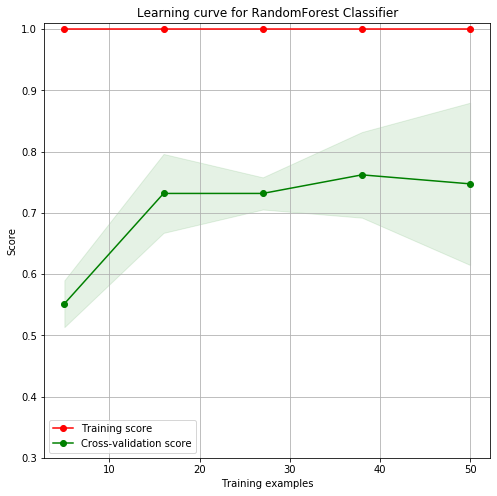

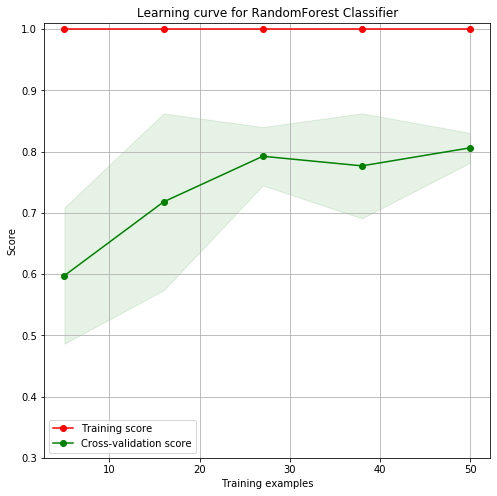

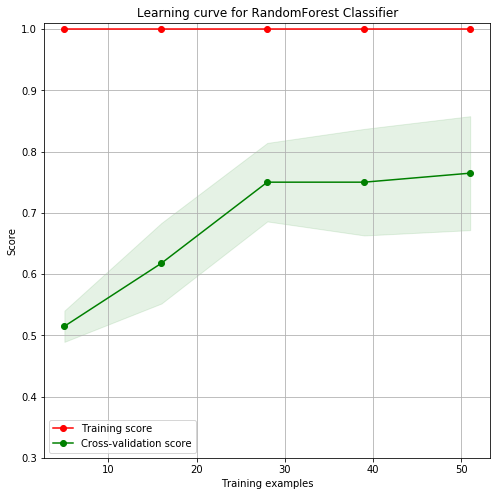

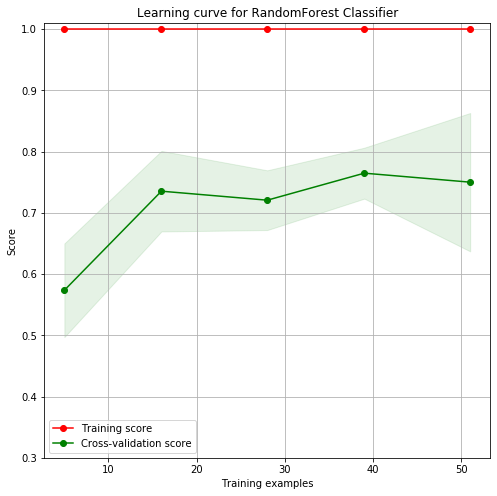

In [49]:
# Lasso with random forest

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of features: {len(data.columns)-1}')
y_labels = data['label']
del data['label']

y = sklearn.preprocessing.label_binarize(y_labels, ['T12', 'T34']) # 0 now stands for T12 and 1 for T34
y = [i[0] for i in y]
y = np.array(y)

cv_4fold = model_selection.StratifiedKFold(n_splits=4, shuffle=True)
split_X_train, split_X_test, split_y_train, split_y_test = train_test_split(data, y,
                                                    stratify=y, 
                                                    test_size=0.2)

# Loop over the folds
for _ in range(0,1):
    for training_index, validation_index in cv_4fold.split(split_X_train, split_y_train):
        train_scores = []
        test_scores = []
        X_validation = split_X_train.iloc[validation_index]
        y_validation = split_y_train[validation_index]
        X_train = split_X_train.iloc[training_index]
        y_train = split_y_train[training_index]

        # 1. Scaling 
        scaler = preprocessing.StandardScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_validation_scaled = scaler.transform(X_validation)

        # 2. Lasso
        
        # WEET NIET: hoe moet je alpha tunen en de treshold bepalen, bij alpha zal hij altijd de grootste alpha kiezen en een getal keer de median is volledig random gekozen nu

        # Now first use the selectfrom model module. Select all features with a weight above the median.
        # grid_param =  {'alpha': [10000000000000, 1000, 100, 10, 10**(-2), 10**(-4), 10**(-6), 10**(-8), 10**(-10), 10**(-12)]}
        # grid_search = GridSearchCV(Lasso(),param_grid=grid_param,cv=skf,n_jobs=-1,verbose=2) 
        # grid_search.fit(X_train_scaled, y_train)

        # best_hyperparameters = grid_search.best_params_

        # # Best hyperparameters
        # alpha = best_hyperparameters.get('alpha')
        # print(alpha)
        # best_result = grid_search.best_score_  
        # print(best_result)

        # # Apply classifier with tuned hyperparameters
        # classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, bootstrap=bootstrap)
        # classifier.fit(X_train_lasso, y_train)

        selector = SelectFromModel(estimator=Lasso(alpha=(10**(-10)), random_state=None), threshold='1.25*median')
        selector.fit(X_train_scaled, y_train)
        n_original = X_train_scaled.shape[1]
        X_train_lasso = selector.transform(X_train_scaled)
        X_validation_lasso = selector.transform(X_validation_scaled)
        n_selected = X_train_lasso.shape[1]
        print(X_train_lasso.shape)
        print(f"Selected {n_selected} from {n_original} features.")

        ## RandomForest Classification
        # Stratified K-fold Cross validation
        k = 4
        skf = StratifiedKFold(k, random_state=0) # cv kan ook op None --> geeft default --> 5-fold cross validation

        # Tuning the hyperparameters
        grid_param = {'n_estimators': [10, 50, 100, 200, 400],'criterion': ['gini', 'entropy'],'bootstrap': [True, False]}
        grid_search = GridSearchCV(RandomForestClassifier(),param_grid=grid_param,cv=skf,n_jobs=-1,verbose=2) 
        grid_search.fit(X_train_lasso, y_train)

        best_hyperparameters = grid_search.best_params_

        # Best hyperparameters
        n_estimators = best_hyperparameters.get('n_estimators')
        criterion = best_hyperparameters.get('criterion')
        bootstrap = best_hyperparameters.get('bootstrap')
        print(n_estimators)
        print(criterion)
        print(bootstrap)
        best_result = grid_search.best_score_  
        print(best_result)

        # Apply classifier with tuned hyperparameters
        classifier = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, bootstrap=bootstrap)
        classifier.fit(X_train_lasso, y_train)

        # Calculate accuracy
        classifier_predictions_test = classifier.predict(X_validation_lasso)
        accuracy = metrics.accuracy_score(y_validation, classifier_predictions_test)
        print(accuracy)
        print('#'*80)

        # Learning curve
        title = 'Learning curve for RandomForest Classifier'
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111)
        plot_learning_curve(classifier, title, X_train_lasso, y_train, ax, ylim=(0.3, 1.01), cv=skf)

